In [1]:
from src import utils

# Import pandas
import pandas as pd

# Import seaborn
import seaborn as sns


In [2]:
# Buat path menuju X_train.pkl dan simpan di dalam X_TRAIN_PATH
X_TRAIN_PATH = 'data/interim/X_train.pkl'

# Deserialisasi data dengan mengunakan fungsi dari utils
X_train = utils.deserialize_data(X_TRAIN_PATH)
X_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15884,25,241875,MORTGAGE,4.0,EDUCATION,A,16000,7.05,0.07,N,4
15138,21,18000,RENT,5.0,PERSONAL,B,1500,12.18,0.08,N,4
7474,25,53000,MORTGAGE,10.0,MEDICAL,B,16000,12.53,0.30,N,2
18212,28,16800,OWN,NaN,MEDICAL,C,5000,13.98,0.30,N,8
6493,25,50000,MORTGAGE,2.0,VENTURE,A,10000,7.90,0.20,N,2
...,...,...,...,...,...,...,...,...,...,...,...
14621,25,98000,MORTGAGE,9.0,HOMEIMPROVEMENT,E,25000,16.45,0.26,N,4
18736,30,65000,RENT,0.0,MEDICAL,C,16000,13.06,0.25,N,8
1663,22,20000,RENT,7.0,EDUCATION,A,1675,7.74,0.08,N,3
18257,29,110000,RENT,4.0,HOMEIMPROVEMENT,E,24000,18.39,0.22,Y,8


In [3]:
# Buat path menuju y_train.pkl dan simpan di dalam y_TRAIN_PATH
y_TRAIN_PATH = 'data/interim/y_train.pkl'

# Deserialisasi data dengan mengunakan fungsi dari utils
y_train = utils.deserialize_data(y_TRAIN_PATH)
y_train

15884    0
15138    1
7474     0
18212    1
6493     0
        ..
14621    1
18736    0
1663     0
18257    0
17068    1
Name: loan_status, Length: 26064, dtype: int64

In [4]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15884,25,241875,MORTGAGE,4.0,EDUCATION,A,16000,7.05,0.07,N,4
15138,21,18000,RENT,5.0,PERSONAL,B,1500,12.18,0.08,N,4
7474,25,53000,MORTGAGE,10.0,MEDICAL,B,16000,12.53,0.30,N,2
18212,28,16800,OWN,NaN,MEDICAL,C,5000,13.98,0.30,N,8
6493,25,50000,MORTGAGE,2.0,VENTURE,A,10000,7.90,0.20,N,2


### EDA: Exploratory Data Analysis

In [5]:
# mengidentifikasi kolom dengan tipe value numerik
num_col = X_train.select_dtypes(include=['number']).columns.tolist()
num_col


['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [6]:
# mengidentifikasi kolom dengan tipe value kategorik
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()
cat_col

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 15884 to 17068
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  object 
 3   person_emp_length           25326 non-null  float64
 4   loan_intent                 26064 non-null  object 
 5   loan_grade                  26064 non-null  object 
 6   loan_amnt                   26064 non-null  int64  
 7   loan_int_rate               23563 non-null  float64
 8   loan_percent_income         26064 non-null  float64
 9   cb_person_default_on_file   26064 non-null  object 
 10  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


-- Catatan: 
Terlihat bahwa kolom yang bertipe kategorik adalah:
 'person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file'
Pada kolom di atas akan dicek apa saja value-nya dan jumlah masing-masing value-nya. Kolom kategorik akan diubah dengan One Hot Encoding atau Label Encoding, sehingga value pada kolom-kolom tersebut menjadi numerik. Ini dilakukan agar data dapat diproses dalam model. 

In [8]:
# mengidentifikasi data duplikat

duplicates      = X_train.duplicated(keep = False)

column_to_check = X_train.sort_values(by='person_income')

duplicate_rows  = column_to_check[duplicates]

duplicate_rows


C:\Users\nggar\AppData\Local\Temp\ipykernel_12012\1051421261.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicate_rows  = column_to_check[duplicates]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
16821,24,7800,RENT,1.0,EDUCATION,B,1000,11.36,0.13,N,4
15952,24,7800,RENT,1.0,EDUCATION,B,1000,11.36,0.13,N,4
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,0.18,N,4
28295,32,18000,OWN,0.0,VENTURE,A,4750,7.88,0.26,N,6
...,...,...,...,...,...,...,...,...,...,...,...
27677,35,160000,OWN,10.0,VENTURE,B,24000,11.83,0.15,N,9
29160,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0.08,N,17
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0.08,N,17
27881,28,604000,MORTGAGE,12.0,PERSONAL,B,25000,9.01,0.04,N,9


-- Catatan: 

Dari pengecekan yang dilakukan, terdapat beberapa baris duplikat dalam data `X_train`.

Menghapus baris duplikat dari dataset `X_train` untuk memastikan bahwa setiap data point hanya muncul sekali dengan menggunakan fungsi `drop_duplicates` untuk menghapus baris duplikat dari `X_train`.


In [9]:
# mengecek null value 
null_data = X_train.isnull().sum()

null_data

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              738
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2501
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

-- Catatan: 
   
Hanya ada dua kolom, yaitu person_emp_length dan loan_int_rate yang memiliki data kosong. Ini perlu dipikirkan, apakah akan dilakukan teknik imputasi untuk data yang kosong atau sama sekali menghapus data-data tersebut. Sepertinya mengisi data kosong dengan teknik imputasi adalah cara yang patut dicoba. Mungkin mengisi data kosong dengan mean, median, atau modus? Sepertinya dengan median bisa dicoba terlebih dahulu

In [10]:
# mengecek sebaran data numerik

X_train_ = X_train[num_col]

X_train_

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
15884,25,241875,4.0,16000,7.05,0.07,4
15138,21,18000,5.0,1500,12.18,0.08,4
7474,25,53000,10.0,16000,12.53,0.30,2
18212,28,16800,NaN,5000,13.98,0.30,8
6493,25,50000,2.0,10000,7.90,0.20,2
...,...,...,...,...,...,...,...
14621,25,98000,9.0,25000,16.45,0.26,4
18736,30,65000,0.0,16000,13.06,0.25,8
1663,22,20000,7.0,1675,7.74,0.08,3
18257,29,110000,4.0,24000,18.39,0.22,8


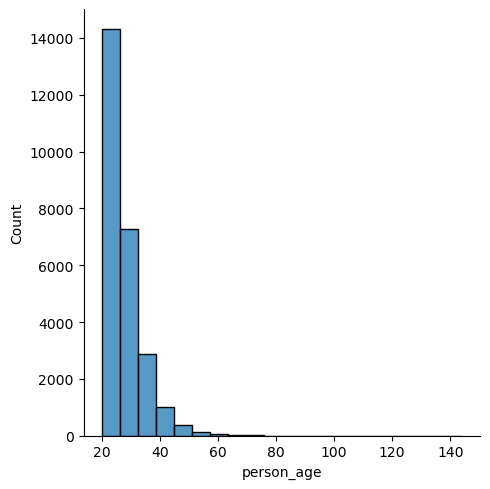

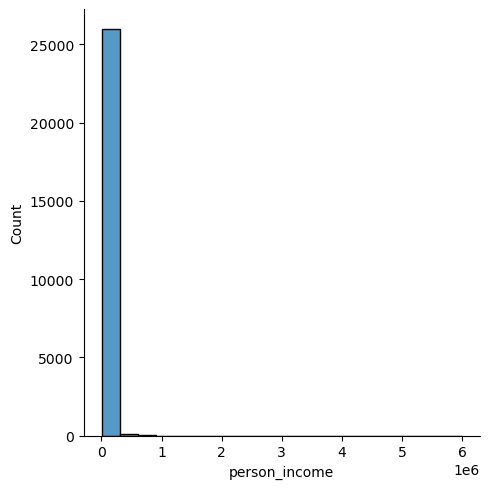

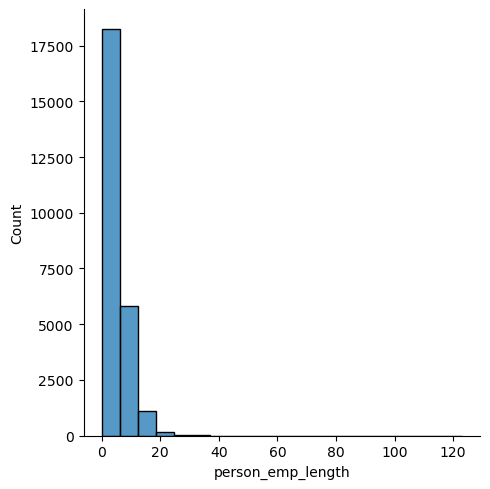

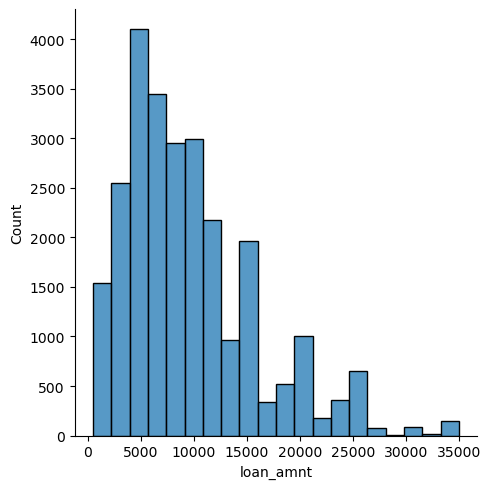

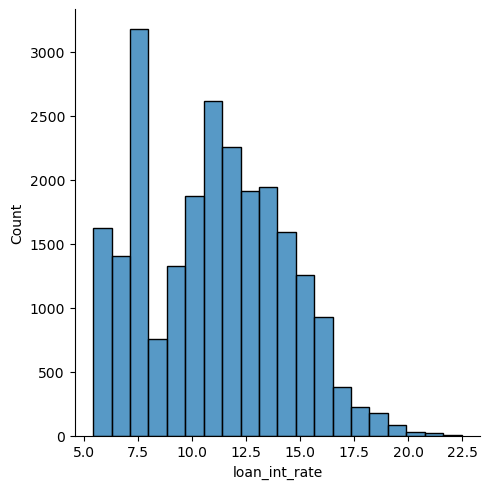

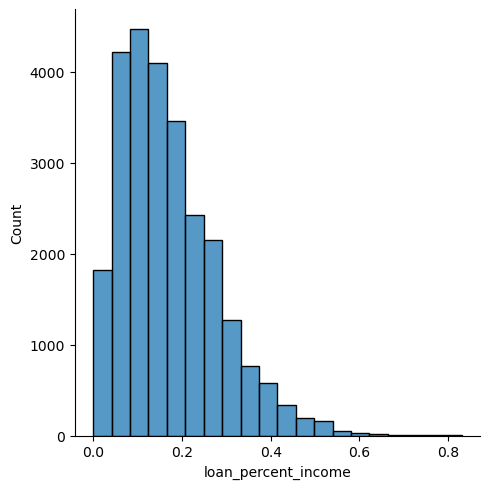

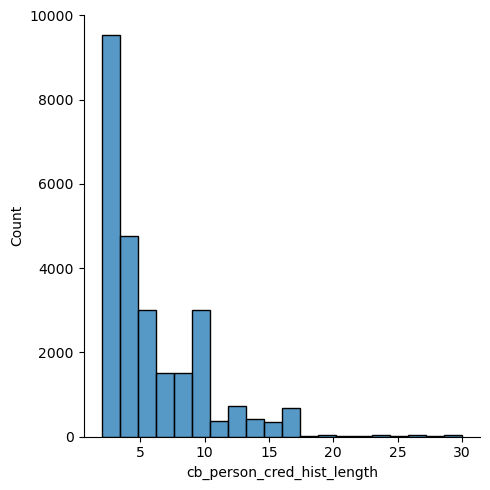

In [11]:
for col in X_train_.columns.tolist():
    sns.displot(X_train[col], bins = 20)

-- Catatan:

Beberapa kolom numerik memiliki distribusi yang miring atau skewed. Untuk mengatasi ini, dapat dilakukan transformasi 
data 
   
1. Normalisasi atau Standarisasi:
   - Untuk kolom numerik, dilakukan normalisasi atau standarisasi untuk memastikan data memiliki skala yang sama.

2. Penanganan Outliers:
   - Identifikasi dan penanganan outliers agar tidak mempengaruhi performa model, misalkan dengan menggunakan IQR.

<Axes: xlabel='loan_status', ylabel='count'>

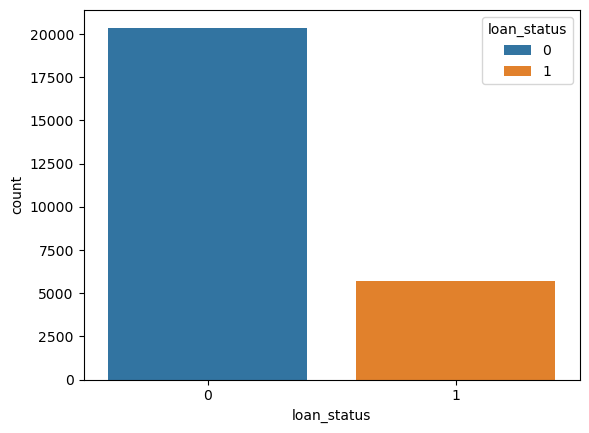

In [12]:
# mengecek target balance

sns.countplot(x='loan_status', hue='loan_status', data=pd.DataFrame(y_train))


-- Catatan:
    
Dari sini terlihat bahwa ada data yang tidak seimbang pada kolom target, di mana data 0 (non default) lebih banyak dibandingkan
dengan data 1 (default). Solusinya, diperlukan algoritma yang memiliki pengaturan weight untuk mengatasi ketidakseimbangan data 
seperti logistic regression atau algoritma yang tidak sensitif terhadap ketidakseimbangan ini seperti random forest. 
Secara umum diperlukan teknik cross validation dan pengukuran metrik klasifikasi seperti  auc-roc. 

Dari beberapa telaah di atas, berikut adalah rangkuman tindakan yang dibutuhkan.

1. Terkait adanya kolom kategorik:
-  Lakukan pengecekan value dan jumlah value di kolom kategorik.
-  Terapkan One Hot Encoding atau Label Encoding.

2. Terkait adanya duplikat data:
-  Hapus baris duplikat dari X_train.

3. Terkait adanya data kosong:
-  Hapus baris dengan data kosong di kolom person_emp_length dan loan_int_rate.

4. Terkait transformasi data: 
-  Terapkan normalisasi atau standarisasi pada kolom numerik.
-  Identifikasi dan tangani outliers.

5. Terkait dengan proporsi data target yang tidak seimbang:
-  Gunakan algoritma dengan pengaturan weight atau algoritma yang tidak sensitif terhadap ketidakseimbangan.
-  Lakukan cross-validation dan gunakan metrik klasifikasi yang sesuai seperti AUC-ROC.